<a href="https://colab.research.google.com/github/KrishnaPandya-VGEC-IT/Machine-Learning/blob/main/Try_of_twitter_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import requests
import io
import re 
import nltk
import string
import warnings

In [ ]:
import string

In [ ]:
pd.set_option("display.max_colwidth",200) 
warnings.filterwarnings("ignore") #ignore warnings

In [ ]:
fields = ['date','favourites_count','followers_count','language','location','retweet_count','screen_name','tweet','tweet_id','verified']
df = pd.read_csv('/content/drive/MyDrive/combined_csv.csv',usecols=fields,dtype={'text':str},encoding = 'latin-1')
df.head(20)

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0
5,06-02-2020 18:19,78557.0,36582.0,en,America,112,AFunnyValentine,"RT @sxdoc: Coronavirus: The Media Says ""Shoot The Messenger!"" | Peak Prosperity. Bioweapon or Mutated Virus? Background &amp; Stats. https://t.",1.23E+18,0
6,06-02-2020 18:19,31520.0,239.0,en,"del rio, tx",472,bornbytherio,RT @CBSNews: BREAKING: Chinese doctor who sounded the alarm on coronavirus dies of illness https://t.co/J90rdmna5D https://t.co/H9APyBlJrd,1.23E+18,0
7,06-02-2020 18:19,220278.0,1547.0,en,"Erie, PA",114,benjred,RT @NBCNews: Prominent Chinese doctor who was punished by police when he tried to warn his fellow medics about the coronavirus has died fro,1.23E+18,0
8,06-02-2020 18:19,2626.0,388.0,es,"Tampa, FL",0,new_spanish,Murió por el coronavirus uno de los primeros médicos que intentó advertir sobre la enfermedad y fue silenciado por el gobierno chino https://t.co/AcgnsMOtqM EL CORONAVIRUS SE CONVIRTIÓ EN UN ENEMI...,1.23E+18,0
9,06-02-2020 18:19,49425.0,16936.0,en,"Dallas, Texas USA",0,QNNTexas,"The Lies We Are Being Told About The Coronavirus\n6 Feb 2020 - 12:19:00 pm\n\nby Tyler Durden Wed, 02/05/2020 - 18:45\nhttps://t.co/C4NeLwVkQg",1.23E+18,0


In [ ]:
df.describe()

,favourites_count,followers_count
count,5.408150e+05,5.408010e+05
mean,5.485302e+04,1.879467e+04
std,9.389402e+04,5.260213e+05
min,0.000000e+00,0.000000e+00
25%,3.957000e+03,2.180000e+02
50%,1.943200e+04,7.920000e+02
75%,6.365500e+04,2.984000e+03
max,2.504738e+06,8.730460e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545929 entries, 0 to 545928
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              545880 non-null  object 
 1   favourites_count  540815 non-null  float64
 2   followers_count   540801 non-null  float64
 3   language          540801 non-null  object 
 4   location          533910 non-null  object 
 5   retweet_count     540801 non-null  object 
 6   screen_name       540801 non-null  object 
 7   tweet             545866 non-null  object 
 8   tweet_id          540787 non-null  object 
 9   verified          540787 non-null  object 
dtypes: float64(2), object(8)
memory usage: 41.7+ MB


In [ ]:
df.head(10)

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0
5,06-02-2020 18:19,78557.0,36582.0,en,America,112,AFunnyValentine,"RT @sxdoc: Coronavirus: The Media Says ""Shoot The Messenger!"" | Peak Prosperity. Bioweapon or Mutated Virus? Background &amp; Stats. https://t.",1.23E+18,0
6,06-02-2020 18:19,31520.0,239.0,en,"del rio, tx",472,bornbytherio,RT @CBSNews: BREAKING: Chinese doctor who sounded the alarm on coronavirus dies of illness https://t.co/J90rdmna5D https://t.co/H9APyBlJrd,1.23E+18,0
7,06-02-2020 18:19,220278.0,1547.0,en,"Erie, PA",114,benjred,RT @NBCNews: Prominent Chinese doctor who was punished by police when he tried to warn his fellow medics about the coronavirus has died fro,1.23E+18,0
8,06-02-2020 18:19,2626.0,388.0,es,"Tampa, FL",0,new_spanish,Murió por el coronavirus uno de los primeros médicos que intentó advertir sobre la enfermedad y fue silenciado por el gobierno chino https://t.co/AcgnsMOtqM EL CORONAVIRUS SE CONVIRTIÓ EN UN ENEMI...,1.23E+18,0
9,06-02-2020 18:19,49425.0,16936.0,en,"Dallas, Texas USA",0,QNNTexas,"The Lies We Are Being Told About The Coronavirus\n6 Feb 2020 - 12:19:00 pm\n\nby Tyler Durden Wed, 02/05/2020 - 18:45\nhttps://t.co/C4NeLwVkQg",1.23E+18,0


In [ ]:
df['cleaned_tweet'] = df['tweet'].str.replace("@","") #remove @
df.head()

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified,cleaned_tweet
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly"
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía el_pais
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0,RT AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix


In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].str.split('https').str[0] # split the string by https and take first part. like " hello. here is link: https://www.google.com" -> "hello here is the link:" 
df.head()

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified,cleaned_tweet
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0,"Coronavirus disrupts China meat imports, food supply during pork shortage"
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0,Confusión sobre el estado del médico que alertó sobre el coronavirus
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0,Silenced Chinese Doc Dies of Coronavirus | Medpage Today
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0,RT AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies


In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace("I","") # replace I with empty string  (In short, remove I from tweets)

In [ ]:
#removing punctuations, numbers and special characters

df['cleaned_tweet'] = df['cleaned_tweet'].str.replace("[^a-zA-Z]"," ") # remove all the characters except alphabets (like @,#,!)
df['cleaned_tweet'].astype(str)
df.head()

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified,cleaned_tweet
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0,Coronavirus disrupts China meat imports food supply during pork shortage
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0,Confusi n sobre el estado del m dico que alert sobre el coronavirus
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0,Silenced Chinese Doc Dies of Coronavirus Medpage Today
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0,RT AMErikaNGRLLL Doctor who sounded alarm on coronavirus dies


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords # to remove words like am, is, are from tweet (which are just redundant)
stop = stopwords.words('english') # list of stopwords in english language
df['cleaned_tweet'].astype(str)
df.dtypes

date                 object
favourites_count    float64
followers_count     float64
language             object
location             object
retweet_count        object
screen_name          object
tweet                object
tweet_id             object
verified             object
cleaned_tweet        object
dtype: object

In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) # remove stop words like am, is, are...

In [ ]:
df

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified,cleaned_tweet
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0,Coronavirus disrupts China meat imports food supply pork shortage
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0,Confusi n sobre el estado del dico que alert sobre el coronavirus
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0,Silenced Chinese Doc Dies Coronavirus Medpage Today
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0,RT AMErikaNGRLLL Doctor sounded alarm coronavirus dies
...,...,...,...,...,...,...,...,...,...,...,...
545924,24-08-2020,NaN,NaN,NaN,NaN,NaN,NaN,37 day streak of this #meditation app ???@synctuition? ?? 25 min daily! Ive tried a lot of apps but this is legit. #Mindfulness #COVID19 #2020 pic.twitter.com/cdZNycYZst,NaN,NaN,day streak meditation app synctuition min daily tried lot apps legit Mindfulness COVD pic twitter com cdZNycYZst
545925,24-08-2020,NaN,NaN,NaN,NaN,NaN,NaN,Did I miss the #COVID19 Dashboard and release tonight #Bahamas??,NaN,NaN,Did miss COVD Dashboard release tonight Bahamas
545926,24-08-2020,NaN,NaN,NaN,NaN,NaN,NaN,#Flu Vaccination Urged During #COVID19 Pandemic.\n\n#Vaccination can reduce #flu severity and prevent hospitalizationscritical considerations at a time when the health care system is burdened by ...,NaN,NaN,Flu Vaccination Urged During COVD Pandemic Vaccination reduce flu severity prevent hospitalizations critical considerations time health care system burdened coronavirus
545927,24-08-2020,NaN,NaN,NaN,NaN,NaN,NaN,Un grupo de expertos alemanes realiza una misión en nuestro país para definir una agenda de colaboración bilateral sobre #Covid19 e intercambiar experiencias\n\n https://www.heraldo.mx/experiencia...,NaN,NaN,Un grupo de expertos alemanes realiza una misi n en nuestro pa para definir una agenda de colaboraci n bilateral sobre Covid e intercambiar experiencias


In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str).apply(lambda x: x.split()) # split cleaned_tweet string into list of words
df.head()

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified,cleaned_tweet
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0,"[Ten, More, Diagnosed, With, Coronavirus, Aboard, Quarantined, Cruise, Ship, Off, Japan]"
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0,"[Coronavirus, disrupts, China, meat, imports, food, supply, pork, shortage]"
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0,"[Confusi, n, sobre, el, estado, del, dico, que, alert, sobre, el, coronavirus]"
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0,"[Silenced, Chinese, Doc, Dies, Coronavirus, Medpage, Today]"
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0,"[RT, AMErikaNGRLLL, Doctor, sounded, alarm, coronavirus, dies]"


In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x])) # apply rejoin from the list of words
df.head() #print first 5 rows of df dataframe

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified,cleaned_tweet
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0,Coronavirus disrupts China meat imports food supply pork shortage
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0,Confusi n sobre el estado del dico que alert sobre el coronavirus
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0,Silenced Chinese Doc Dies Coronavirus Medpage Today
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0,RT AMErikaNGRLLL Doctor sounded alarm coronavirus dies


**Data Visualization**

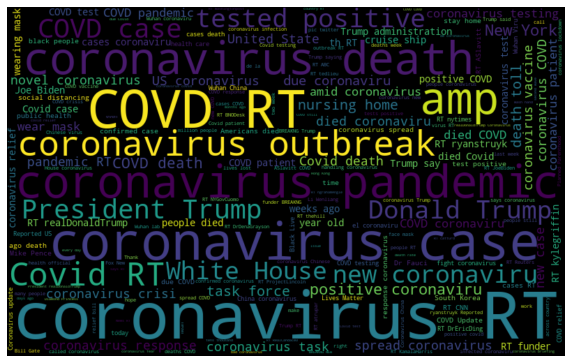

In [ ]:
all_words = ' '.join([text for text in df['cleaned_tweet']])

from wordcloud import WordCloud # create the word cloud to find maximum occuring words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [ ]:
df['Day'] = df['date'].str[0:10] # take first 11 characters as day
df.head(1000) #print first 1000 rows (not needed that much)

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified,cleaned_tweet,Day
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan,06-02-2020
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0,Coronavirus disrupts China meat imports food supply pork shortage,06-02-2020
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0,Confusi n sobre el estado del dico que alert sobre el coronavirus,06-02-2020
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0,Silenced Chinese Doc Dies Coronavirus Medpage Today,06-02-2020
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0,RT AMErikaNGRLLL Doctor sounded alarm coronavirus dies,06-02-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
995,06-02-2020 18:33,62128.0,31.0,en,"Inglewood, CA",479,99_idc,RT @SunnyCheungky: Wuhan doctor Li WenLiang died from the coronavirus. He warned about the possibility of an epidemic if the virus is not p,1.23E+18,0,RT SunnyCheungky Wuhan doctor Li WenLiang died coronavirus He warned possibility epidemic virus p,06-02-2020
996,06-02-2020 18:33,15832.0,266.0,en,USA,2613,AndreasBoos,RT @nytimes: Dr. Li Wenliang warned colleagues weeks ago about what would become the coronavirus outbreak and was censured by police in Wuh,1.23E+18,0,RT nytimes Dr Li Wenliang warned colleagues weeks ago would become coronavirus outbreak censured police Wuh,06-02-2020
997,06-02-2020 18:33,146731.0,912.0,en,"DAYTON, OH WhoWhatWhereWhy",111,HotHonduran,RT @PDChina: China's Macao's 1st confirmed novel #coronavirus infection patient had recovered from the disease and was discharged from hosp,1.23E+18,0,RT PDChina China Macao st confirmed novel coronavirus infection patient recovered disease discharged hosp,06-02-2020
998,06-02-2020 18:33,2334.0,28.0,en,"Hell, Alabama",0,LokiNPace,"#Coronavirus ? Rest in Peace, Dr. Wenliang. Thank you for everything. You tried desperately to stop this. #ChineseGoverment is committing a horrific crime against humanity. @UN Wake Up!!! https://...",1.23E+18,0,Coronavirus Rest Peace Dr Wenliang Thank everything You tried desperately stop ChineseGoverment committing horrific crime humanity UN Wake Up,06-02-2020


In [ ]:
pip install mpld3  # to add the feature of zoom in the matplotlib graphs

In [ ]:
%matplotlib inline
import mpld3
mpld3.enable_notebook() # to add the feature of zoom in the matplotlib graphs

In [ ]:
def get_tweet_sentiment(tweet): # function to find maximum occuring positive and negative word from a tweet (in string format)
  list_positive_words = ['recovered','survived','vaccine','vaccination','recovery','immunity','immunization','cases reduced','recovering','reducing cases','diagnosed','happy','covid negative'] #list of positive words
  list_negative_words = ['died','infected','spread','death','infect','rip','cases increased','increasing cases','alarming rate','sad','covd','coronavirus','covid positive','pandemic','covid 19'] #list of negative words
  count_positive_words = [0,0,0,0,0,0,0,0,0,0,0,0,0] #counts of each positive word
  count_negative_words = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #counts of each negative word
  tweet2 = tweet.split(' ') #split the tweet in words
  for i in range(0,len(list_positive_words)):  # for each positive word
    for j in range(0,len(tweet2)): # check the list of the tweet words
      if list_positive_words[i]==tweet2[j]: # if both matches
        count_positive_words[i]+=1 # increase the count of that positive word by 1 
  for i in range(0,len(list_negative_words)): # for each negative word
    for j in range(0,len(tweet2)): # check the list of the tweet words
      if list_negative_words[i] == tweet2[j]: # if both matches
        count_negative_words[i]+=1 # increase the count of that negative word by 1

  max_val_positive = 0 # variable to find frequency maximum occuring positive word
  position_positive = -1 # location of maximum occuring positive word
  for i in range(0,len(count_positive_words)): # for each positive word
    if(count_positive_words[i]>max_val_positive): # if it is highest in count 
      max_val_positive = count_positive_words[i] # update the frequency
      position_positive = i # update the location

  max_val_negative = 0 # same as above but for negative_word
  position_negative = -1  
  for i in range(0,len(count_negative_words)):
    if(count_negative_words[i]>max_val_negative):
      max_val_negative = count_negative_words[i]
      position_negative = i
  return max_val_positive, list_positive_words[position_positive],max_val_negative,list_negative_words[position_negative];
  

In [ ]:
df.head(10) # print first 10 rows of df dataframe

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified,cleaned_tweet,Day
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan,06-02-2020
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0,Coronavirus disrupts China meat imports food supply pork shortage,06-02-2020
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0,Confusi n sobre el estado del dico que alert sobre el coronavirus,06-02-2020
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0,Silenced Chinese Doc Dies Coronavirus Medpage Today,06-02-2020
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0,RT AMErikaNGRLLL Doctor sounded alarm coronavirus dies,06-02-2020
5,06-02-2020 18:19,78557.0,36582.0,en,America,112,AFunnyValentine,"RT @sxdoc: Coronavirus: The Media Says ""Shoot The Messenger!"" | Peak Prosperity. Bioweapon or Mutated Virus? Background &amp; Stats. https://t.",1.23E+18,0,RT sxdoc Coronavirus The Media Says Shoot The Messenger Peak Prosperity Bioweapon Mutated Virus Background amp Stats,06-02-2020
6,06-02-2020 18:19,31520.0,239.0,en,"del rio, tx",472,bornbytherio,RT @CBSNews: BREAKING: Chinese doctor who sounded the alarm on coronavirus dies of illness https://t.co/J90rdmna5D https://t.co/H9APyBlJrd,1.23E+18,0,RT CBSNews BREAKNG Chinese doctor sounded alarm coronavirus dies illness,06-02-2020
7,06-02-2020 18:19,220278.0,1547.0,en,"Erie, PA",114,benjred,RT @NBCNews: Prominent Chinese doctor who was punished by police when he tried to warn his fellow medics about the coronavirus has died fro,1.23E+18,0,RT NBCNews Prominent Chinese doctor punished police tried warn fellow medics coronavirus died fro,06-02-2020
8,06-02-2020 18:19,2626.0,388.0,es,"Tampa, FL",0,new_spanish,Murió por el coronavirus uno de los primeros médicos que intentó advertir sobre la enfermedad y fue silenciado por el gobierno chino https://t.co/AcgnsMOtqM EL CORONAVIRUS SE CONVIRTIÓ EN UN ENEMI...,1.23E+18,0,Muri por el coronavirus uno de los primeros dicos que intent advertir sobre la enfermedad fue silenciado por el gobierno chino,06-02-2020
9,06-02-2020 18:19,49425.0,16936.0,en,"Dallas, Texas USA",0,QNNTexas,"The Lies We Are Being Told About The Coronavirus\n6 Feb 2020 - 12:19:00 pm\n\nby Tyler Durden Wed, 02/05/2020 - 18:45\nhttps://t.co/C4NeLwVkQg",1.23E+18,0,The Lies We Are Being Told About The Coronavirus Feb pm Tyler Durden Wed,06-02-2020


In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].str.lower() #convert the cleaned tweet column values into lowercase
df.head(10) #print first 10 rows of dataframe

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified,cleaned_tweet,Day,max_val_positive,max_val_negative,list_positive_words,list_negative_words
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0,ten more diagnosed with coronavirus aboard quarantined cruise ship off japan,06-02-2020,0,0,diagnosed,alarming rate
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0,coronavirus disrupts china meat imports food supply pork shortage,06-02-2020,0,0,diagnosed,alarming rate
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0,confusi n sobre el estado del dico que alert sobre el coronavirus,06-02-2020,0,0,diagnosed,alarming rate
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0,silenced chinese doc dies coronavirus medpage today,06-02-2020,0,0,diagnosed,alarming rate
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0,rt amerikangrlll doctor sounded alarm coronavirus dies,06-02-2020,0,0,diagnosed,alarming rate
5,06-02-2020 18:19,78557.0,36582.0,en,America,112,AFunnyValentine,"RT @sxdoc: Coronavirus: The Media Says ""Shoot The Messenger!"" | Peak Prosperity. Bioweapon or Mutated Virus? Background &amp; Stats. https://t.",1.23E+18,0,rt sxdoc coronavirus the media says shoot the messenger peak prosperity bioweapon mutated virus background amp stats,06-02-2020,0,0,diagnosed,alarming rate
6,06-02-2020 18:19,31520.0,239.0,en,"del rio, tx",472,bornbytherio,RT @CBSNews: BREAKING: Chinese doctor who sounded the alarm on coronavirus dies of illness https://t.co/J90rdmna5D https://t.co/H9APyBlJrd,1.23E+18,0,rt cbsnews breakng chinese doctor sounded alarm coronavirus dies illness,06-02-2020,0,0,diagnosed,alarming rate
7,06-02-2020 18:19,220278.0,1547.0,en,"Erie, PA",114,benjred,RT @NBCNews: Prominent Chinese doctor who was punished by police when he tried to warn his fellow medics about the coronavirus has died fro,1.23E+18,0,rt nbcnews prominent chinese doctor punished police tried warn fellow medics coronavirus died fro,06-02-2020,0,1,diagnosed,died
8,06-02-2020 18:19,2626.0,388.0,es,"Tampa, FL",0,new_spanish,Murió por el coronavirus uno de los primeros médicos que intentó advertir sobre la enfermedad y fue silenciado por el gobierno chino https://t.co/AcgnsMOtqM EL CORONAVIRUS SE CONVIRTIÓ EN UN ENEMI...,1.23E+18,0,muri por el coronavirus uno de los primeros dicos que intent advertir sobre la enfermedad fue silenciado por el gobierno chino,06-02-2020,0,0,diagnosed,alarming rate
9,06-02-2020 18:19,49425.0,16936.0,en,"Dallas, Texas USA",0,QNNTexas,"The Lies We Are Being Told About The Coronavirus\n6 Feb 2020 - 12:19:00 pm\n\nby Tyler Durden Wed, 02/05/2020 - 18:45\nhttps://t.co/C4NeLwVkQg",1.23E+18,0,the lies we are being told about the coronavirus feb pm tyler durden wed,06-02-2020,0,0,diagnosed,alarming rate


In [ ]:
grpby = df.groupby(['Day']).agg({'cleaned_tweet' : ''.join}) # perform groupby in terms of 'Day' column, and for 'cleaned_tweet', combine all the tweets of that 'Day'

In [ ]:
grpby['max_val_positive'] = 0 # count of maximum occuring positive word
grpby['max_val_negative'] = 0 # count of maximum occuring negative word
grpby['list_positive_words'] = '' # maximum occuring positive word
grpby['list_negative_words'] = '' # maximum occuring negative word

In [ ]:
df.head(10) #print first 10 rows of df dataframe

,date,favourites_count,followers_count,language,location,retweet_count,screen_name,tweet,tweet_id,verified,cleaned_tweet,Day,max_val_positive,max_val_negative,list_positive_words,list_negative_words
0,06-02-2020 18:19,3452.0,2485.0,en,WI,0,herbstdw,Ten More Diagnosed With Coronavirus Aboard Quarantined Cruise Ship Off Japan https://t.co/svT9w8lSMA,1.23E+18,0,ten more diagnosed with coronavirus aboard quarantined cruise ship off japan,06-02-2020,1,0,diagnosed,sad
1,06-02-2020 18:19,151.0,9754.0,en,United States,0,drpatfarrell,"Coronavirus disrupts China meat imports, food supply during pork shortage https://t.co/QeCppOG2lB #news #feedly",1.23E+18,0,coronavirus disrupts china meat imports food supply pork shortage,06-02-2020,0,0,happy,sad
2,06-02-2020 18:19,15339.0,2732.0,es,"Mexico, ME",0,ManicPixieDgirl,Confusión sobre el estado del médico que alertó sobre el coronavirus https://t.co/ZjhqzMmroC vía @el_pais,1.23E+18,0,confusi n sobre el estado del dico que alert sobre el coronavirus,06-02-2020,0,0,happy,sad
3,06-02-2020 18:19,65345.0,6498.0,en,"Madison, WI",0,s3bland57,Silenced Chinese Doc Dies of Coronavirus | Medpage Today https://t.co/ywbLoi4GJM,1.23E+18,0,silenced chinese doc dies coronavirus medpage today,06-02-2020,0,0,happy,sad
4,06-02-2020 18:19,7398.0,3509.0,en,USA #HCQWorks,52,kxLED1,RT @AMErikaNGIRLLL: Doctor who sounded alarm on coronavirus dies https://t.co/NoBzTdrVix,1.23E+18,0,rt amerikangrlll doctor sounded alarm coronavirus dies,06-02-2020,0,0,happy,sad
5,06-02-2020 18:19,78557.0,36582.0,en,America,112,AFunnyValentine,"RT @sxdoc: Coronavirus: The Media Says ""Shoot The Messenger!"" | Peak Prosperity. Bioweapon or Mutated Virus? Background &amp; Stats. https://t.",1.23E+18,0,rt sxdoc coronavirus the media says shoot the messenger peak prosperity bioweapon mutated virus background amp stats,06-02-2020,0,0,happy,sad
6,06-02-2020 18:19,31520.0,239.0,en,"del rio, tx",472,bornbytherio,RT @CBSNews: BREAKING: Chinese doctor who sounded the alarm on coronavirus dies of illness https://t.co/J90rdmna5D https://t.co/H9APyBlJrd,1.23E+18,0,rt cbsnews breakng chinese doctor sounded alarm coronavirus dies illness,06-02-2020,0,0,happy,sad
7,06-02-2020 18:19,220278.0,1547.0,en,"Erie, PA",114,benjred,RT @NBCNews: Prominent Chinese doctor who was punished by police when he tried to warn his fellow medics about the coronavirus has died fro,1.23E+18,0,rt nbcnews prominent chinese doctor punished police tried warn fellow medics coronavirus died fro,06-02-2020,0,1,happy,died
8,06-02-2020 18:19,2626.0,388.0,es,"Tampa, FL",0,new_spanish,Murió por el coronavirus uno de los primeros médicos que intentó advertir sobre la enfermedad y fue silenciado por el gobierno chino https://t.co/AcgnsMOtqM EL CORONAVIRUS SE CONVIRTIÓ EN UN ENEMI...,1.23E+18,0,muri por el coronavirus uno de los primeros dicos que intent advertir sobre la enfermedad fue silenciado por el gobierno chino,06-02-2020,0,0,happy,sad
9,06-02-2020 18:19,49425.0,16936.0,en,"Dallas, Texas USA",0,QNNTexas,"The Lies We Are Being Told About The Coronavirus\n6 Feb 2020 - 12:19:00 pm\n\nby Tyler Durden Wed, 02/05/2020 - 18:45\nhttps://t.co/C4NeLwVkQg",1.23E+18,0,the lies we are being told about the coronavirus feb pm tyler durden wed,06-02-2020,0,0,happy,sad


In [ ]:
grpby.head(10) # print first 10 values of grpby dataframe

,cleaned_tweet,max_val_positive,max_val_negative,list_positive_words,list_negative_words
Day,,,,,
01-03-2020,rt teamtrump watch kayleighmcenany sad democrats rooting stock market collapse coronavirus hurt prt yspyg us cases there confirmed presumptive positive cases coronavirus united statesrt themarkpan...,0,0,,
01-04-2020,rt acosta at coronavirus briefing trump stressing us enter rough two week periodafp how many people died coronavirus flu vaccination reportedrt ebrandt coronavirus updates california cases pass ce...,0,0,,
01-05-2020,ford wants restart us car plants shut coronavirus convince unionrt alexsalvinews breakng michigan republican led legislature blocks extension state covd emergency declaration votesrt danbarrynyt t...,0,0,,
01-06-2020,rt jiggyjayy said nick cannon lupus still protesting covid someone comments said lupus aint contagiousalaneadamsbooks my daughter winner rd grade excited we loved reading essays thank giving stude...,0,0,,
01-07-2020,deaths hospitalizations covid dropping dramatically we testing x ppl april course cases many asymptomatic the virus seems mutated weakened this herdmmunity time movehydrate wear mask hydrate wear ...,0,0,,
01-08-2020,think goes walter reed get blood vets recovered covd the vampire presidentnarrator two days later closed customers tested positive covid virusblessed health care workers serve courage heal sick pr...,0,0,,
02-03-2020,n case anyone worried caronavirusoutbreak coronavirus covd smoking weakens immune systemrt politico unclear senior health officials agencies knew coronavirus test problems learnert stillgray one p...,0,0,,
02-04-2020,rt funder breakng cnn msnbc cut away trump coronavirus press conference stopairingtrumpthe male equivalent covid bangs covid mulletrt cuomoprimetime what good say praying coronavirus patients ange...,0,0,,
02-05-2020,applying lessons crisis mitigation covd fb notes prove general flynn side he lied fbcoronavirus transmission thread dr craig a spencerrt prayingmedic f evidence effectiveness chloroquine derivativ...,0,0,,


In [ ]:
for i in range(0,len(grpby.index)): # for each clean_tweet in grpby dataframe
    v1,v2,v3,v4 = get_tweet_sentiment(grpby['cleaned_tweet'].iloc[i]) # get 4 return values from function
    grpby.iloc[i,grpby.columns.get_loc('max_val_positive')] = v1 # assign 1st returned value from function to 'max_val_positive' column
    grpby.iloc[i,grpby.columns.get_loc('list_positive_words')] = v2 # assign 2nd returned value to 'list_positive_words' column
    grpby.iloc[i,grpby.columns.get_loc('max_val_negative')] = v3 # assign 3rd returned value from function to 'max_val_negative' column
    grpby.iloc[i,grpby.columns.get_loc('list_negative_words')] = v4 # assign 4th returned value to 'list_negative_words' column

In [ ]:
grpby.head(10) #print first 10 values of grpby dataframe

,cleaned_tweet,max_val_positive,max_val_negative,list_positive_words,list_negative_words
Day,,,,,
01-03-2020,rt teamtrump watch kayleighmcenany sad democrats rooting stock market collapse coronavirus hurt prt yspyg us cases there confirmed presumptive positive cases coronavirus united statesrt themarkpan...,27,3434,vaccine,coronavirus
01-04-2020,rt acosta at coronavirus briefing trump stressing us enter rough two week periodafp how many people died coronavirus flu vaccination reportedrt ebrandt coronavirus updates california cases pass ce...,19,2528,recovered,coronavirus
01-05-2020,ford wants restart us car plants shut coronavirus convince unionrt alexsalvinews breakng michigan republican led legislature blocks extension state covd emergency declaration votesrt danbarrynyt t...,33,2218,vaccine,coronavirus
01-06-2020,rt jiggyjayy said nick cannon lupus still protesting covid someone comments said lupus aint contagiousalaneadamsbooks my daughter winner rd grade excited we loved reading essays thank giving stude...,45,1557,vaccine,coronavirus
01-07-2020,deaths hospitalizations covid dropping dramatically we testing x ppl april course cases many asymptomatic the virus seems mutated weakened this herdmmunity time movehydrate wear mask hydrate wear ...,6,94,happy,covd
01-08-2020,think goes walter reed get blood vets recovered covd the vampire presidentnarrator two days later closed customers tested positive covid virusblessed health care workers serve courage heal sick pr...,3,41,recovered,covd
02-03-2020,n case anyone worried caronavirusoutbreak coronavirus covd smoking weakens immune systemrt politico unclear senior health officials agencies knew coronavirus test problems learnert stillgray one p...,73,3481,vaccine,coronavirus
02-04-2020,rt funder breakng cnn msnbc cut away trump coronavirus press conference stopairingtrumpthe male equivalent covid bangs covid mulletrt cuomoprimetime what good say praying coronavirus patients ange...,20,2709,survived,coronavirus
02-05-2020,applying lessons crisis mitigation covd fb notes prove general flynn side he lied fbcoronavirus transmission thread dr craig a spencerrt prayingmedic f evidence effectiveness chloroquine derivativ...,42,2281,vaccine,coronavirus


In [ ]:
grpby['day_col'] = grpby.index #create a new column called 'day_col' which stores the day
grpby.head(10) #print first 10 values of grpby dataframe

,cleaned_tweet,max_val_positive,max_val_negative,list_positive_words,list_negative_words,day_col
Day,,,,,,
01-03-2020,rt teamtrump watch kayleighmcenany sad democrats rooting stock market collapse coronavirus hurt prt yspyg us cases there confirmed presumptive positive cases coronavirus united statesrt themarkpan...,27,3434,vaccine,coronavirus,01-03-2020
01-04-2020,rt acosta at coronavirus briefing trump stressing us enter rough two week periodafp how many people died coronavirus flu vaccination reportedrt ebrandt coronavirus updates california cases pass ce...,19,2528,recovered,coronavirus,01-04-2020
01-05-2020,ford wants restart us car plants shut coronavirus convince unionrt alexsalvinews breakng michigan republican led legislature blocks extension state covd emergency declaration votesrt danbarrynyt t...,33,2218,vaccine,coronavirus,01-05-2020
01-06-2020,rt jiggyjayy said nick cannon lupus still protesting covid someone comments said lupus aint contagiousalaneadamsbooks my daughter winner rd grade excited we loved reading essays thank giving stude...,45,1557,vaccine,coronavirus,01-06-2020
01-07-2020,deaths hospitalizations covid dropping dramatically we testing x ppl april course cases many asymptomatic the virus seems mutated weakened this herdmmunity time movehydrate wear mask hydrate wear ...,6,94,happy,covd,01-07-2020
01-08-2020,think goes walter reed get blood vets recovered covd the vampire presidentnarrator two days later closed customers tested positive covid virusblessed health care workers serve courage heal sick pr...,3,41,recovered,covd,01-08-2020
02-03-2020,n case anyone worried caronavirusoutbreak coronavirus covd smoking weakens immune systemrt politico unclear senior health officials agencies knew coronavirus test problems learnert stillgray one p...,73,3481,vaccine,coronavirus,02-03-2020
02-04-2020,rt funder breakng cnn msnbc cut away trump coronavirus press conference stopairingtrumpthe male equivalent covid bangs covid mulletrt cuomoprimetime what good say praying coronavirus patients ange...,20,2709,survived,coronavirus,02-04-2020
02-05-2020,applying lessons crisis mitigation covd fb notes prove general flynn side he lied fbcoronavirus transmission thread dr craig a spencerrt prayingmedic f evidence effectiveness chloroquine derivativ...,42,2281,vaccine,coronavirus,02-05-2020


In [ ]:
s1 = grpby['day_col'].astype(str).values # NOT TO BE ADDED IN THE PROJECT

In [ ]:
s1 # just for checking day_col values. NOT TO BE ADDED IN THE PROJECT

array(['01-03-2020', '01-04-2020', '01-05-2020', '01-06-2020',
       '01-07-2020', '01-08-2020', '02-03-2020', '02-04-2020',
       '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020',
       '02-09-2020', '03-03-2020', '03-04-2020', '03-05-2020',
       '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020',
       '03-10-2020', '04-03-2020', '04-04-2020', '04-05-2020',
       '04-06-2020', '04-07-2020', '04-08-2020', '04-09-2020',
       '04-10-2020', '05-03-2020', '05-04-2020', '05-05-2020',
       '05-06-2020', '05-07-2020', '05-08-2020', '05-09-2020',
       '05-10-2020', '06-02-2020', '06-04-2020', '06-05-2020',
       '06-06-2020', '06-07-2020', '06-08-2020', '06-09-2020',
       '06-10-2020', '07-02-2020', '07-03-2020', '07-04-2020',
       '07-05-2020', '07-07-2020', '07-08-2020', '07-09-2020',
       '07-10-2020', '08-02-2020', '08-03-2020', '08-04-2020',
       '08-05-2020', '08-06-2020', '08-07-2020', '08-08-2020',
       '08-10-2020', '09-02-2020', '09-03-2020', '09-06

In [ ]:
grpby.day_col.dtype

dtype('O')

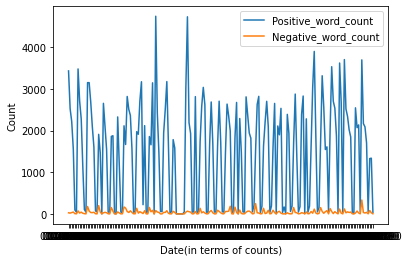

In [ ]:
plt.plot(s1.astype(str), grpby['max_val_negative'])
plt.plot(s1.astype(str), grpby['max_val_positive'])
plt.xlabel('Date(in terms of counts)')
plt.ylabel('Count')
plt.legend(['Positive_word_count','Negative_word_count'])

In [ ]:
"""

Remaining work:

1) Plot the day date on X-axis - It is not feasible because in CSV files some tweet_ids(like 112387487466234678462873 are misplaced in the day column). Hence, 
   it may create a problem. but we can do it by converting it into str. (Just like previous project)

2) Show the label dynamically. (When mouse pointed to any point, it should show that word and the count of that word) - I am not that expert.(I searched stack overflow
   but couldn't found it.- As far as my knowledge is concerned, dynamic lables are possible in scatterplot only)

3) Plot the graph on website.

"""